In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import csv

%matplotlib inline
mpl.rcParams['figure.dpi'] = 800
#mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 7})
font_size = 10

In [2]:
cases = ["mesh_o1_i1", "mesh_o2_i2", "mesh_o3_i3"]
xstrings = [r"75%L",r"100%L","125%L"]

# Mesh Level

The base mesh is considered as 100%L. Where, the number of cells in the each block in blockMesh is considered as base. This case is defined as mesh_o2_i2.
In the case of 75%L mesh level, the number of cells in each block is reduced by 25% than base case. This case is denoted as mesh_o1_i1. In 125%L mesh level, number of cells in each block is increased by 25% from base case. This case is defined as mesh_o3_i3.

In [3]:
a_mean = [[] for i in range(len(cases))]
b_mean = [[] for i in range(len(cases))]
c_mean = [[] for i in range(len(cases))]
a_std  = [[] for i in range(len(cases))]
b_std  = [[] for i in range(len(cases))]
c_std  = [[] for i in range(len(cases))]

for i, case in enumerate(cases):
    
    fo_name = "./data/"+case+"/"
    
    # Cylinder A 
    df_a = pd.read_csv(fo_name + "surfaceFieldValue_a.dat", comment='#', index_col=0, delimiter=r"\s+", usecols=[0,1,2], names=['time', 'cd', 'cl'])
    df_a['cd'] = df_a['cd'].str.replace('(', '', regex=True)
    # Cylinder B
    df_b = pd.read_csv(fo_name + "surfaceFieldValue_b.dat", comment='#', index_col=0, delimiter=r"\s+", usecols=[0,1,2], names=['time', 'cd', 'cl'])
    df_b['cd'] = df_b['cd'].str.replace('(', '', regex=True)
    # Cylinder C
    df_c = pd.read_csv(fo_name + "surfaceFieldValue_c.dat", comment='#', index_col=0, delimiter=r"\s+", usecols=[0,1,2], names=['time', 'cd', 'cl'])
    df_c['cd'] = df_c['cd'].str.replace('(', '', regex=True)

    df_a["cl"] =  2.5 * df_a["cl"] 
    df_b["cl"] =  2.5 * df_b["cl"] 
    df_c["cl"] =  2.5 * df_c["cl"]

    n= 75.00  # trimmig param (first n time step)

    df = pd.read_csv(fo_name + "coefficient.dat", sep="\t", names=['time', 'cd', 'cl'], comment='#', usecols=[0,1,3])
    timescale = df["time"]
    idx = np.abs(timescale-n).argmin()
    trimmed_df_a = df_a.iloc[idx: , :]
    trimmed_df_b = df_b.iloc[idx: , :]
    trimmed_df_c = df_c.iloc[idx: , :]

    a_mean[i].append(trimmed_df_a["cl"].head(len(trimmed_df_a["cl"])-1).mean())
    b_mean[i].append(trimmed_df_b["cl"].head(len(trimmed_df_a["cl"])-1).mean())
    c_mean[i].append(trimmed_df_c["cl"].head(len(trimmed_df_a["cl"])-1).mean())
    a_std[i].append(trimmed_df_a["cl"].head(len(trimmed_df_a["cl"])-1).std())
    b_std[i].append(trimmed_df_b["cl"].head(len(trimmed_df_a["cl"])-1).std())
    c_std[i].append(trimmed_df_c["cl"].head(len(trimmed_df_a["cl"])-1).std())

a_mean = np.asarray(a_mean).flatten()
b_mean = np.asarray(b_mean).flatten()
c_mean = np.asarray(c_mean).flatten()
a_std  = np.asarray(a_std).flatten()
b_std  = np.asarray(b_std).flatten()
c_std  = np.asarray(c_std).flatten()

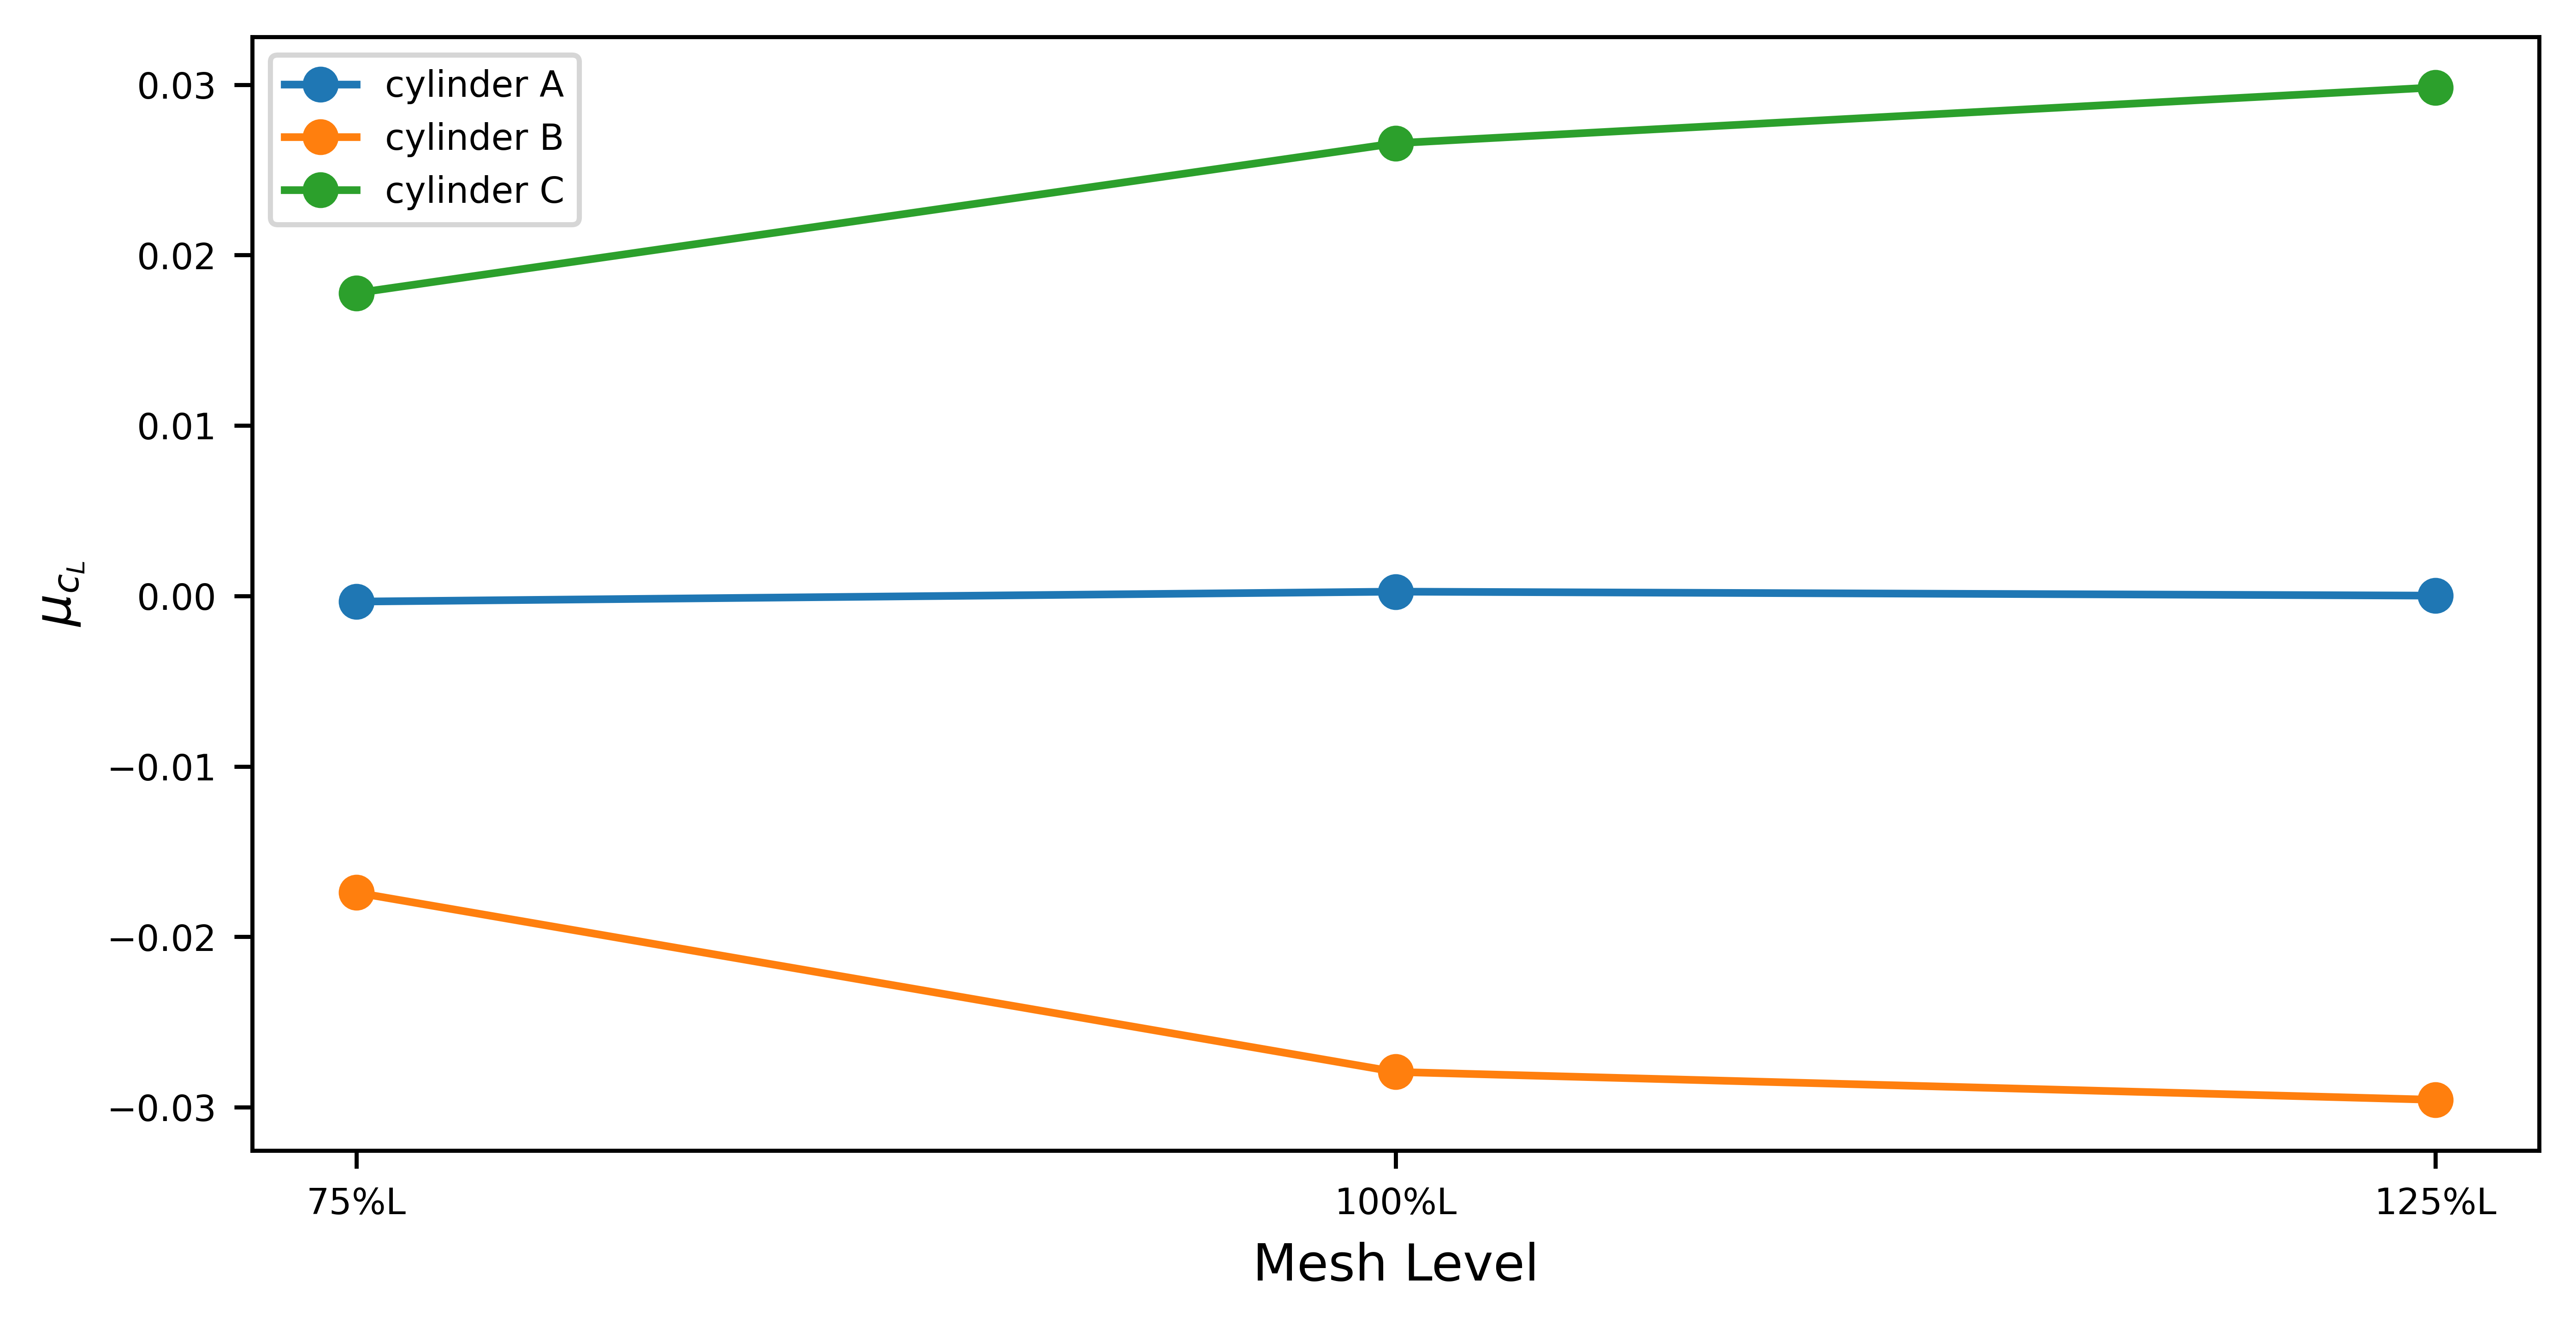

In [6]:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))

ax1.set_ylabel(r"$\mu_{c_L}$", fontsize=font_size)
ax1.set_xlabel(r"Mesh Level", fontsize=font_size)
plt.xticks(np.arange(len(xstrings)), xstrings)

ax1.plot(np.arange(len(a_mean)), a_mean, label="cylinder A", marker="o")
ax1.plot(np.arange(len(b_mean)), b_mean, label="cylinder B", marker="o")
ax1.plot(np.arange(len(c_mean)), c_mean, label="cylinder C", marker="o")

ax1.legend()
fig.savefig('mesh_dependency_means.png')

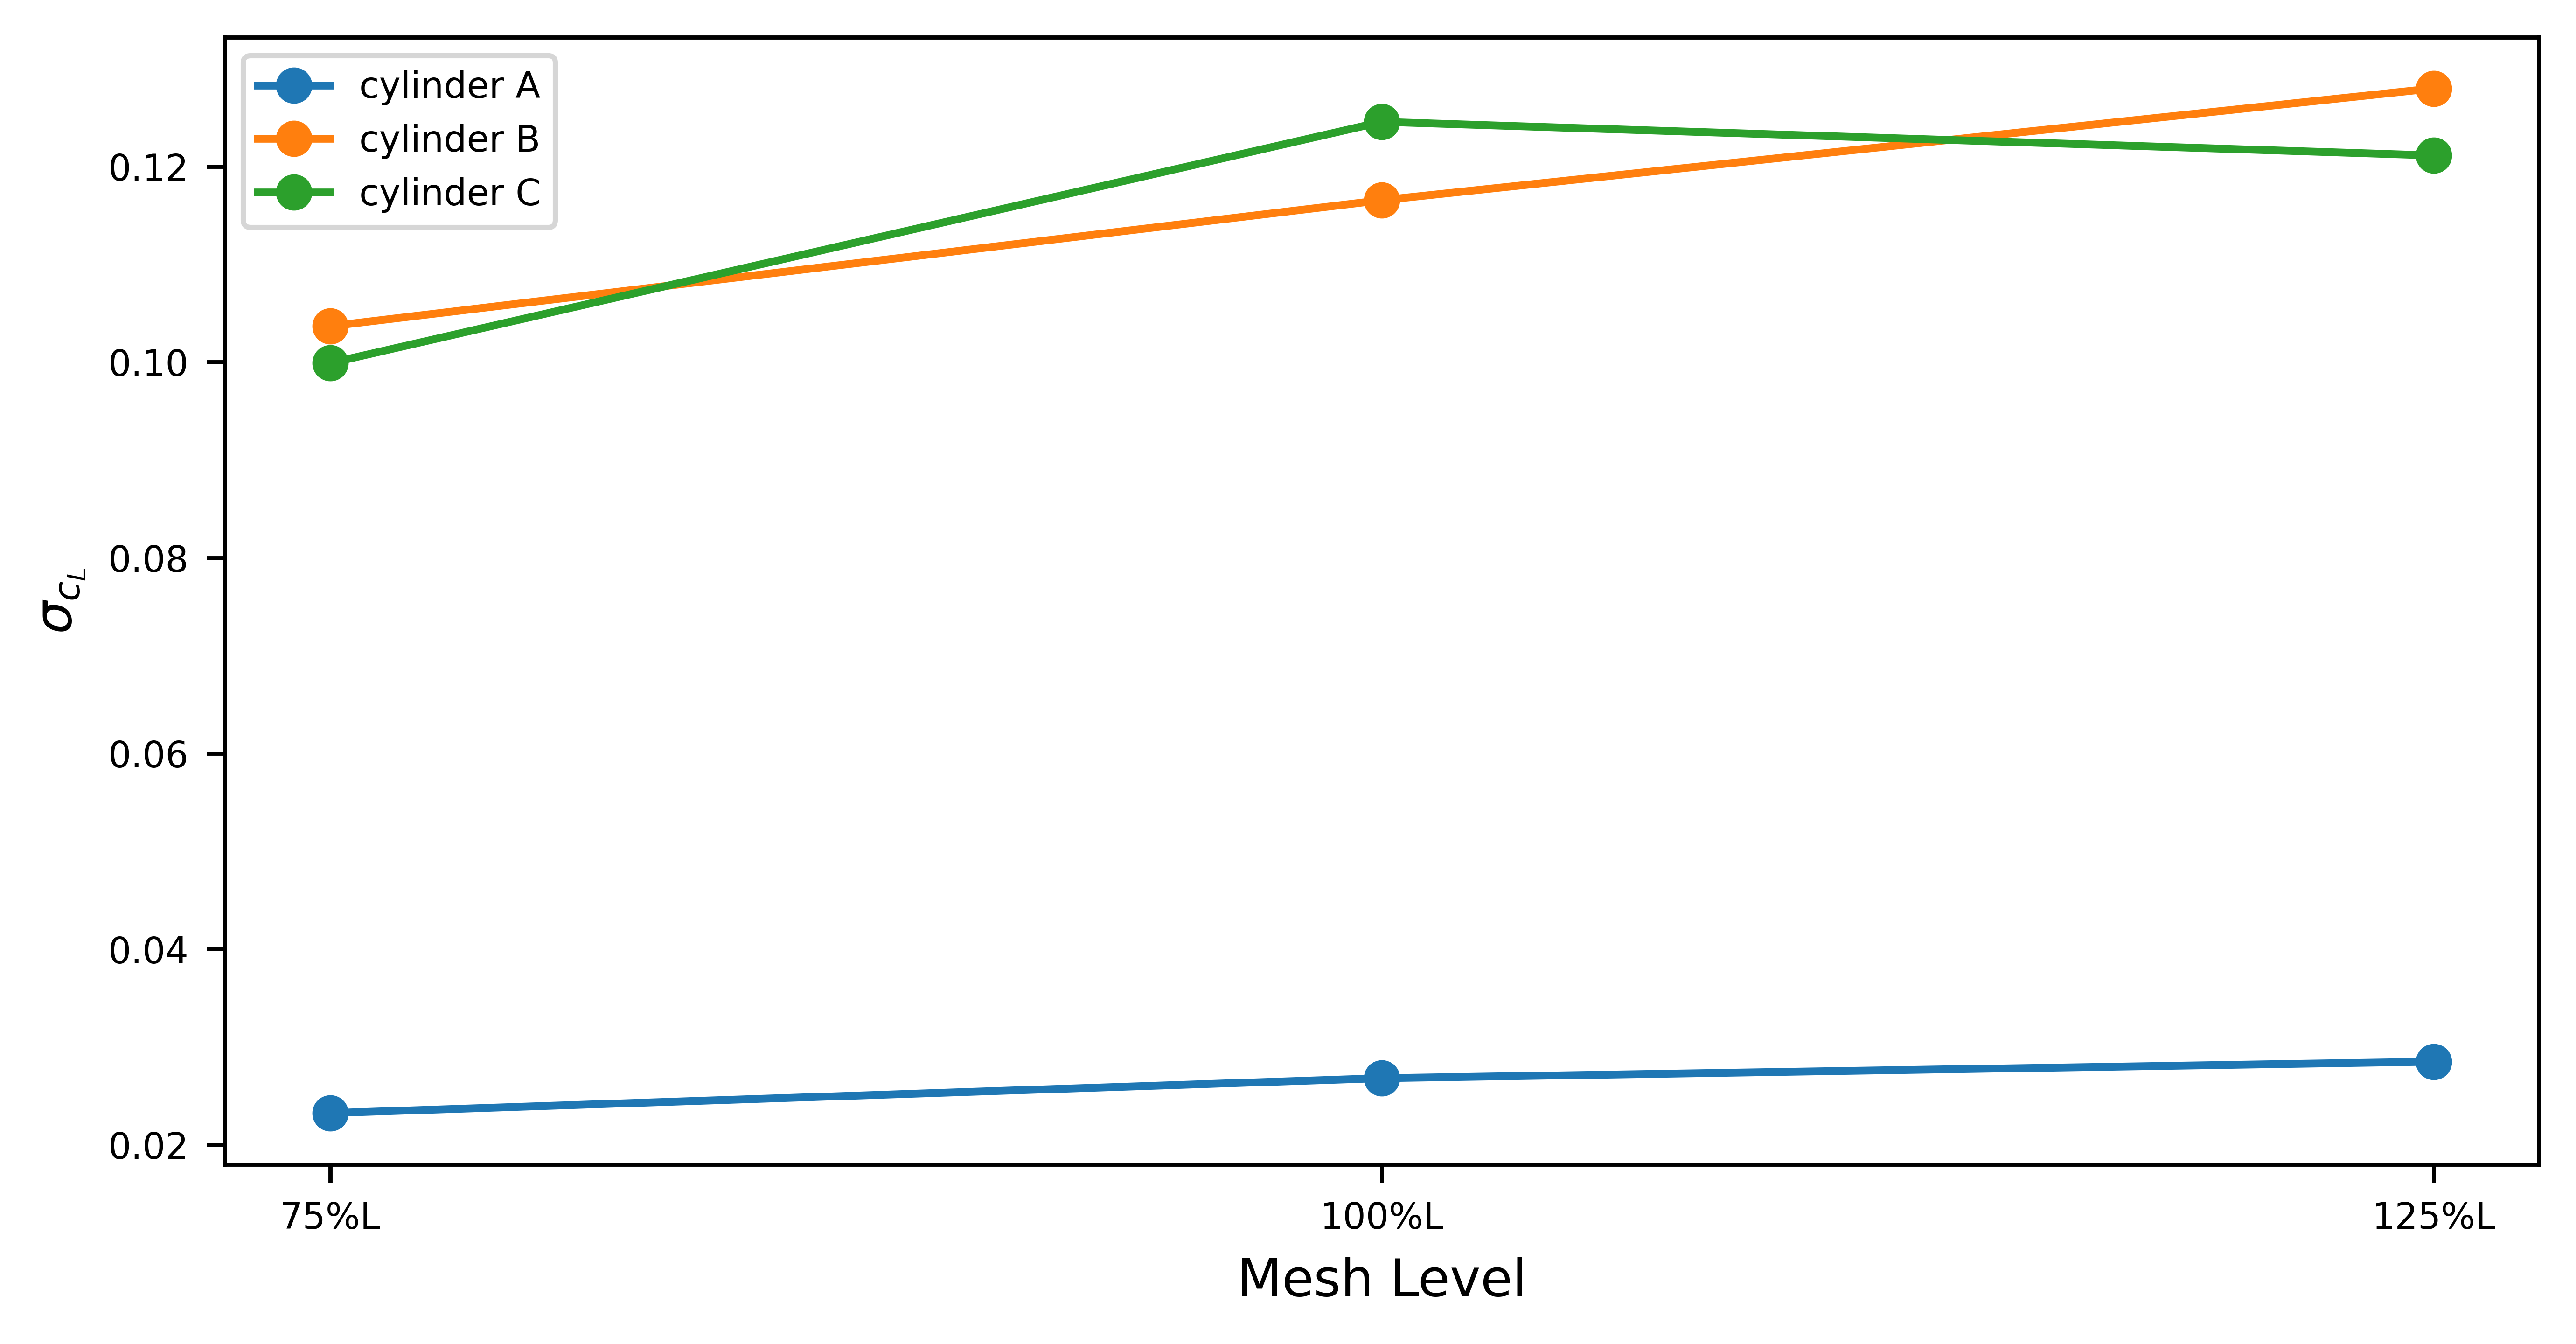

In [7]:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))

ax1.set_ylabel(r"$\sigma_{c_L}$", fontsize=font_size)
ax1.set_xlabel(r"Mesh Level", fontsize=font_size)
plt.xticks(np.arange(len(xstrings)), xstrings)

ax1.plot(np.arange(len(a_std)), a_std, label="cylinder A", marker="o")
ax1.plot(np.arange(len(b_std)), b_std, label="cylinder B", marker="o")
ax1.plot(np.arange(len(c_std)), c_std, label="cylinder C", marker="o")

ax1.legend()
fig.savefig('mesh_dependency_std.png')